In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [2]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [3]:
# Going to use Tesla as the stock I work with

ticker = "TSLA"
start_date = '2017-11-30'
end_date = '2020-11-30'

In [ ]:
stock_date = data.DataReader(ticker, 'iex', start_date, end_date)
print(stock_date.shape)
stock_date.head()

In [2]:
# Try using another aggregation api.

In [1]:
# Need to build out the RSI for this project as well.

In [7]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import yahoo_finance as yf

In [9]:
m = Prophet(weekly_seasonality=False,yearly_seasonality=False)
m.add_seasonality('self_define_cycle',period=8,fourier_order=8,mode='additive')

In [3]:
#import the libraries
import math
import warnings
import datetime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from pandas_datareader import DataReader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM

warnings.filterwarnings("ignore")

In [5]:
#get the stock quote for the past 10 years
stock = input("Enter a stock ticker: ")
num_of_years = 10
start_date = datetime.datetime.now() - datetime.timedelta(days=int(365.25*num_of_years))
end_date = datetime.date.today()

Enter a stock ticker: AAPL


In [6]:
df = DataReader(stock, "yahoo", start_date, end_date)
data = df.filter(['Close'])
dataset = data.values
train_data_len = math.ceil(len(dataset)*.8)

In [7]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-27,11.622857,11.482857,11.530357,11.595715,249816000.0,10.003056
2010-12-28,11.666429,11.609285,11.639643,11.623929,175924000.0,10.027392
2010-12-29,11.658929,11.610714,11.650714,11.617500,163139200.0,10.021846
2010-12-30,11.625357,11.537500,11.624286,11.559286,157494400.0,9.971630
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.937736
...,...,...,...,...,...,...
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996
2020-12-22,134.410004,129.649994,131.610001,131.880005,168904800.0,131.880005


In [8]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#create the training dataset
train_data = scaled_data[0:train_data_len, :]

#split the data into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        #print(x_train)
        #print(y_train)
        print()

#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data to 3 dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

#create test dataset
test_data = scaled_data[train_data_len-60:, :]

#create dataset x_test, y_test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#convert data to numpy array
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/5
1955/1955 [==============================] - 29s 15ms/step - loss: 1.9649e-04 - accuracy: 5.1151e-04
Epoch 2/5
1955/1955 [==============================] - 29s 15ms/step - loss: 9.4036e-05 - accuracy: 5.1151e-04
Epoch 3/5
1955/1955 [==============================] - 28s 14ms/step - loss: 9.5690e-05 - accuracy: 5.1151e-04
Epoch 4/5
1955/1955 [==============================] - 28s 15ms/step - loss: 6.8891e-05 - accuracy: 5.1151e-04
Epoch 5/5
1955/1955 [==============================] - 32s 16ms/step - loss: 5.7204e-05 - accuracy: 5.1151e-04


In [11]:
predictions

array([[ 39.454655],
       [ 39.379333],
       [ 39.65356 ],
       [ 39.70434 ],
       [ 36.352764],
       [ 37.28628 ],
       [ 37.406845],
       [ 37.997337],
       [ 38.577843],
       [ 38.704403],
       [ 38.362892],
       [ 37.829815],
       [ 38.439068],
       [ 38.9243  ],
       [ 39.160942],
       [ 39.377277],
       [ 38.643803],
       [ 38.70175 ],
       [ 38.475952],
       [ 39.541073],
       [ 39.34648 ],
       [ 38.951523],
       [ 41.17952 ],
       [ 41.67438 ],
       [ 41.686382],
       [ 42.7019  ],
       [ 43.453297],
       [ 43.536064],
       [ 42.834377],
       [ 42.686844],
       [ 42.512356],
       [ 42.84475 ],
       [ 42.738525],
       [ 42.859077],
       [ 42.787907],
       [ 42.88766 ],
       [ 43.13558 ],
       [ 42.943996],
       [ 43.335953],
       [ 43.650925],
       [ 43.6939  ],
       [ 43.81032 ],
       [ 43.450726],
       [ 43.822147],
       [ 44.064083],
       [ 44.013424],
       [ 43.786373],
       [ 43.3

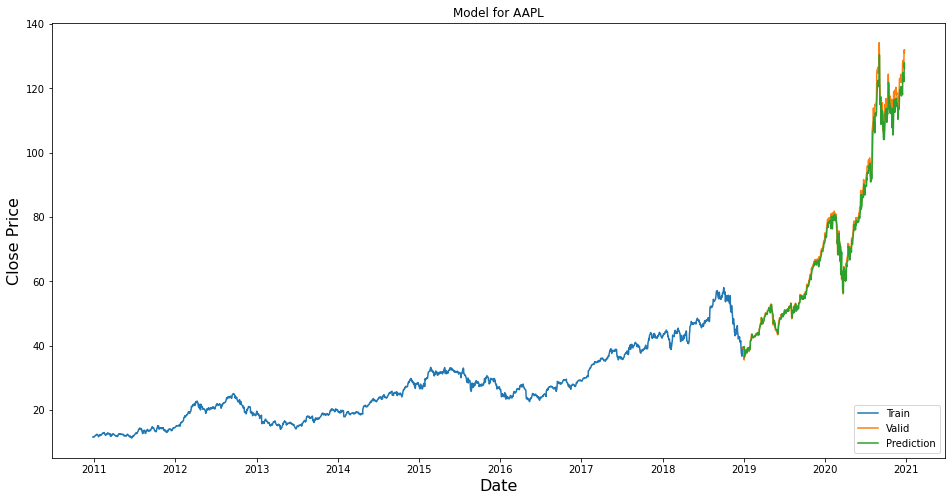

                 Close  Predictions
Date                               
2018-12-28   39.057499    39.454655
2018-12-31   39.435001    39.379333
2019-01-02   39.480000    39.653561
2019-01-03   35.547501    39.704342
2019-01-04   37.064999    36.352764
...                ...          ...
2020-12-18  126.660004   124.478317
2020-12-21  128.229996   122.050339
2020-12-22  131.880005   124.184410
2020-12-23  130.960007   128.013153
2020-12-24  131.970001   126.251396

[503 rows x 2 columns]
The accuracy of the LSTM Model predicting the movement of a stock each day is 47.599999999999994%
     Valid Movement  Predicted Movement
0                 0                   1
1                 0                   0
2                 1                   0
3                 0                   1
4                 1                   0
..              ...                 ...
497               1                   0
498               0                   1
499               0                   0
500       

In [12]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))

#plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model for {}'.format(stock.upper()))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Prediction'],loc='lower right')
plt.show()

print (valid)

# find the accuracy based on predicting day-to-day movements 
valid_movement = []
pred_movement = []
close_prices = valid.Close.tolist()
pred_prices = valid.Predictions.tolist()
        
n = 0

for index, value in enumerate(close_prices[:-1]):
    if value > close_prices[index+1]: 
        valid_movement.append(1)
    else:
        valid_movement.append(0)

for index, value in enumerate(pred_prices[:-1]):
    if value > pred_prices[index+1]: 
        pred_movement.append(1)
    else:
        pred_movement.append(0)

for val, pred in zip(valid_movement, pred_movement):
    if val == pred:
        n=n+1
    else:
        pass

total = len(valid_movement)
accuracy = n/total
print (f'The accuracy of the LSTM Model predicting the movement of a stock each day is {100 * round(accuracy, 3)}%')

dataframe = pd.DataFrame(list(zip(valid_movement, pred_movement)), columns =['Valid Movement', 'Predicted Movement'])
print (dataframe)

#get predicted price for next day
last_60day = data[-60:].values
last_60day_scaled = scaler.transform(last_60day)
xx_test = []
xx_test.append(last_60day_scaled)
xx_test = np.array(xx_test)
xx_test = np.reshape(xx_test, (xx_test.shape[0], xx_test.shape[1],1))
pred = model.predict(xx_test)
pred = scaler.inverse_transform(pred)
pred = pred[0]
pred = pred[0]
print("The predicted price for the next trading day is: {}".format(round(pred, 2)))

#get stats
#Root mean squared error 
print (f'The root mean squared error is {round(rmse, 2)}')

error = mean_squared_error(valid['Close'].tolist(), valid['Predictions'].tolist())
print('Testing Mean Squared Error: %.3f' % error)